<a href="https://colab.research.google.com/github/jdasam/ant6040-2022/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Make Image with Gradient Ascent
- In this Assignment, you have to generate your own artistic image using Deep Dream and Neural Style Transfer
  - You can submit **up to 10 images in total (including both Deep Dream and NST)** 
  - Number of total submitted images will not be included in criteria

- Evaluation Criteria
  - The aesthetic quality of generated images and idea (theme)
    - Not only the visual quality of image, the novelty of idea will be evaluated
  - Proper understanding of algorithm's characteristics
  - Deep Dream and NST will be evaluated separately
    - Therefore, you have to submit at least one images for each algorithm

- Submission
  - Report (pdf)
    - Describe what kind of settings you have tried to generate the final images 
    - Describe the meaning of your work or your artistic intention
    - Describe what is satisfying (or unsatisfying) in your work
  - Images (image format like jpg or png)
    - Selected images of your generation


In [45]:
!pip3 install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/jdasam/pytorch-neural-style-transfer.git
!git clone https://github.com/gordicaleksa/pytorch-deepdream

Cloning into 'pytorch-neural-style-transfer'...
remote: Enumerating objects: 477, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 477 (delta 0), reused 4 (delta 0), pack-reused 469
Receiving objects: 100% (477/477), 37.11 MiB | 42.13 MiB/s, done.
Resolving deltas: 100% (206/206), done.
Cloning into 'pytorch-deepdream'...
remote: Enumerating objects: 492, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 492 (delta 77), reused 72 (delta 72), pack-reused 387
Receiving objects: 100% (492/492), 44.40 MiB | 33.43 MiB/s, done.
Resolving deltas: 100% (257/257), done.


# 1. Deep Dream
- Original Repository: [link](https://github.com/gordicaleksa/pytorch-deepdream)
- Directory: `pytorch-deepdream`

In [7]:

def change_dict_to_argument_script(adict):
  '''
  This function converts a dictionary to a string of arguments
  '''
  return ' '.join(['--{} {}'.format(key, value) for key, value in adict.items()])

def get_default_config_for_deepdream():
  config = {}
  config['input'] = 'figures.jpg'
  config['img_width'] = 600
  config['layers_to_use'] = 'relu4_3'
  config['model_name'] = "VGG16_EXPERIMENTAL"
  config['pretrained_weights'] = "IMAGENET"

  config['pyramid_size'] = 4
  config['pyramid_ratio'] = 1.8
  config['num_gradient_ascent_iterations'] = 10
  config['lr'] = 0.09

  return config

config = get_default_config_for_deepdream()


In [10]:
config

{'input': 'BG-cinema.jpg',
 'img_width': 600,
 'layers_to_use': 'layer2 layer3 layer4',
 'model_name': 'RESNET50',
 'pretrained_weights': 'IMAGENET',
 'pyramid_size': 4,
 'pyramid_ratio': 1.8,
 'num_gradient_ascent_iterations': 10,
 'lr': 0.09}

## Make your Configuration
- `config['model_name`]: CNN model name for deep dream
  - You can select among `VGG16_EXPERIMENTAL` or `RESNET50`
- `config['pretrained_weights']`: The dataset name that was used for training the model for deep dream
  - `VGG16` only support `IMAGENET`
  - With `RESNET50`, you can also select `PLACES_365`
- `config['input']`: File name of image in `pytorch-deepdream/data/input`. It would be used as an initial input image for Deep Dream
- `config['img_width']`: Image pixel in width for resizing. The image would be resized before Deep Dream
- `config['layers_to_use']`: Layers to use for Deep Dream. 
  - For VGG16, you can select among `'relu3_3', 'relu4_1', 'relu4_2', 'relu4_3', 'relu5_1', 'relu5_2', 'relu5_3', 'mp5'`
  - For RESNET50, you can select among `'layer1', 'layer2', 'layer3', 'layer4'`
  - Write the names of the layers separated by space:
    - e.g. `config['layers_to_use'] = 'relu3_3 relu4_1 relu5_2`
- `config['pyramid_size']`: Number of image pyramid iteration
- `config['pyramid_ratio'] `: Ratio of image sizes in pyramid
  - The width of pyramid image is decided by $w / r^{l-1}$ where $w$ is original width and $r$ is pyramid ratio and $l$ is index of pyramide level
  - Therefore, as pyramid_ratio increases, the images will be more reduced for each pyramid level

In [13]:

config = get_default_config_for_deepdream()

# You can comment out the line if you don't want to change the option

config['model_name'] = "RESNET50"
config['pretrained_weights'] = "PLACES_365"

config['input'] = 'BG-cinema.jpg' # the file has to be in pytorch-deepdream/data/input
config['img_width'] = 600

config['layers_to_use'] = 'layer2 layer3 layer4'
# for VGG16, select among ['relu3_3', 'relu4_1', 'relu4_2', 'relu4_3', 'relu5_1', 'relu5_2', 'relu5_3', 'mp5']
# for layers_to_use, write the names of the layers separated by space
# such as 'relu3_3 relu4_1 relu4_3'

config['pyramid_size'] = 4 # type=int, Number of images in an image pyramid
config['pyramid_ratio'] = 1.8 # type=float, Ratio of image sizes in the pyramid
config['num_gradient_ascent_iterations'] = 10 # type=int, Number of gradient ascent iterations
config['lr'] = 0.09 # type=float, Learning rate for gradient ascent


In [14]:
arguments = change_dict_to_argument_script(config)
arguments

'--input BG-cinema.jpg --img_width 600 --layers_to_use layer2 layer3 layer4 --model_name RESNET50 --pretrained_weights PLACES_365 --pyramid_size 4 --pyramid_ratio 1.8 --num_gradient_ascent_iterations 10 --lr 0.09'

In [ ]:
# Make Image!

arguments = change_dict_to_argument_script(config)
!python3 pytorch-deepdream/deepdream.py $arguments
# outputs will be saved on pytorch-deepdream/data/out-images

In [49]:
import matplotlib.pyplot as plt
import PIL

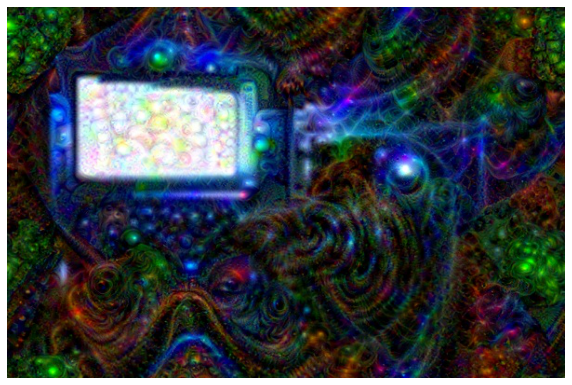

In [55]:
#Cinema_ImageNet
fig = plt.figure(figsize=(10, 15))
Cinema_cold = PIL.Image.open('/content/pytorch-deepdream/data/out-images/RESNET50_IMAGENET/BG-cinema_width_600_model_RESNET50_IMAGENET_layer2_layer3_layer4_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg')
plt.axis('off')
plt.imshow(Cinema_cold)
plt.show()

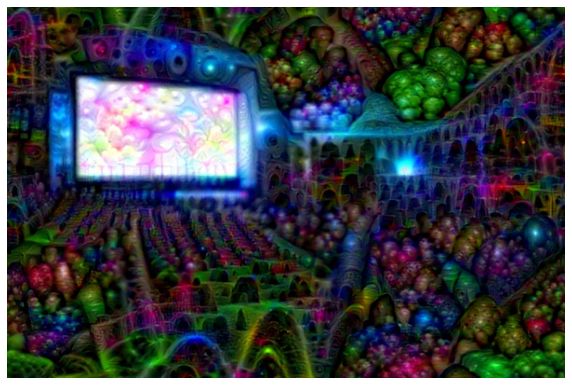

In [54]:
#Cinema_Places365
fig = plt.figure(figsize=(10, 15))
Cinema_cold = PIL.Image.open('/content/pytorch-deepdream/data/out-images/RESNET50_PLACES_365/BG-cinema_width_600_model_RESNET50_PLACES_365_layer2_layer3_layer4_pyrsize_4_pyrratio_1.8_iter_10_lr_0.09_shift_32_smooth_0.5.jpg')
plt.axis('off')
plt.imshow(Cinema_cold)
plt.show()

# 2. Neural Style Transfer
- Original Repository: [link]()
- Edited Repository: [link](https://github.com/jdasam/pytorch-neural-style-transfer)
  - I have added layer selection function for `vgg16exp`

In [16]:
def change_dict_to_argument_script(adict):
  '''
  This function converts a dictionary to a string of arguments
  '''
  return ' '.join(['--{} {}'.format(key, value) for key, value in adict.items()])

def get_default_config_for_nst():
  config = {}
  config['content_img_name'] = 'figures.jpg'
  config['style_img_name'] = 'vg_starry_night.jpg'
  config['height'] = 400

  config['content_weight'] = 1e4
  config['style_weight'] = 3e3
  config['tv_weight'] = 1e-1

  config['optimizer'] = 'lbfgs'
  config['model'] = 'vgg19'
  config['init_method'] = 'content'
  config['saving_freq'] = -1

  return config



## Make your Configuration
- `config['content_img_name']`: Image file name for content image
  - The image has to be located in `pytorch-neural-style-transfer/data/content-images/`
  - e.g. If the image file's path is `pytorch-neural-style-transfer/data/content-images/my_content_image.jpg`, you have to enter `'my_content_image.jpg'`
- `config['style_img_name'] `: Image file name fro style image
  - The image has to be located in `pytorch-neural-style-transfer/data/style-images/`
- `config['height']`: Image height in pixel that resizes
  - The content image and style image will be resized to this specific height before NST

- `config['content_weight']`: The loss weight for content
  - If you increase this value, the optimization would focus more on reconstructing the content of content image
  - 1e5 means $1 \times 10^5$
- `config['style_weight']`: The loss weight for content
  - If you increase this value, the optimization would focus more on reconstructing the gram matrix (style) of the style image
  - If the loss weight is too large, it can produce `nan` loss error
  - 3e4 means $3 \times 10^4$
- `config['tv_weight']`: The loss weight for total variance
  - To make the output image smoother, we add total variance loss
  - This calculates the difference between adjacent pixels and try to reduce their difference
  - If you increase the value of `tv_weight`, the image would be more smoothed

- `config['optimizer']`: Optimizer name for optimizing (generating) the image
  - There are two available options that are implemented: `'lbfgs'` and `'adam'`
  - Original paper used `'lbfgs'`
  - People also uses `'adam'`, because it is the most popular optimizer in typical deep learning

- `config['model']`: Model name code
  - Only two available options: `'vgg16'`, and `'vgg19'`
  - Both model shares very similar architecture, but `'vgg16'` uses 16 layers while `'vgg19'` uses 19 layers

- `config['init_method']`: Initialization method
  - Three available options: `'content'`, `'style'`, and `'random'`
  - This select the initial image that will be optimized (transformed) to satisfy the both content and style
  - If you want to transform style image to content image, you can select `'style'` option
  - If you want to start from random noise, you can select `'random'`



- `config['saving_freq']`: Image save frequency
  - If the value is not -1, the program will save the image for every n-th iteration 
    - e.g. if `config['saving_freq'] = 100`, the program will save the intermediate result for every 100 iterations
    - The number of total iteration is set to 1000 for `lbfgs`, and 3000 for `adam`

In [41]:
config = get_default_config_for_nst()

# You can comment out the line if you don't want to change the option

config['content_img_name'] = 'BG-cinema.jpg'
config['style_img_name'] = 'candy.jpg'
config['height'] = 400

config['content_weight'] = 1e5
config['style_weight'] = 3e1
config['tv_weight'] = 1e-1

config['optimizer'] = 'lbfgs'
config['model'] = 'vgg19' #'vgg16exp'
config['init_method'] = 'random'
config['saving_freq'] = -1


In [42]:
config

{'content_img_name': 'BG-cinema.jpg',
 'style_img_name': 'candy.jpg',
 'height': 400,
 'content_weight': 100000.0,
 'style_weight': 30.0,
 'tv_weight': 0.1,
 'optimizer': 'lbfgs',
 'model': 'vgg19',
 'init_method': 'random',
 'saving_freq': -1}

In [43]:
arguments = change_dict_to_argument_script(config)
arguments

'--content_img_name BG-cinema.jpg --style_img_name candy.jpg --height 400 --content_weight 100000.0 --style_weight 30.0 --tv_weight 0.1 --optimizer lbfgs --model vgg19 --init_method random --saving_freq -1'

In [44]:
# Make Image!

arguments = change_dict_to_argument_script(config)
!python3 pytorch-neural-style-transfer/neural_style_transfer.py $arguments

# The output image will be saved in pytorch-neural-style-transfer/data/output-images/

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using vgg19 in the optimization procedure.
L-BFGS | iteration: 000, total loss=71067951104.0000, content_loss=2757070117.1875, style loss=68296304640.0000, tv loss=14585193.6000
L-BFGS | iteration: 001, total loss=71067951104.0000, content_loss=2757069921.8750, style loss=68296296960.0000, tv loss=14585193.6000
L-BF

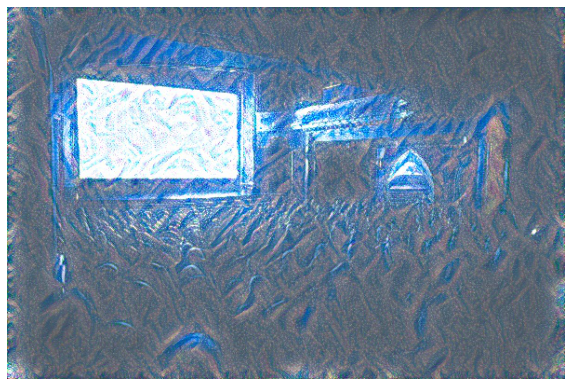

In [ ]:
#Cinema_light
fig = plt.figure(figsize=(10, 15))
Cinema_light = PIL.Image.open('/content/pytorch-neural-style-transfer/data/output-images/combined_BG-cinema_Feel_1/BG-cinema_Feel_1_o_lbfgs_i_content_h_400_m_vgg16exp_cw_100000.0_sw_3000.0_tv_0.1.jpg')
plt.axis('off')
plt.imshow(Cinema_light)
plt.show()

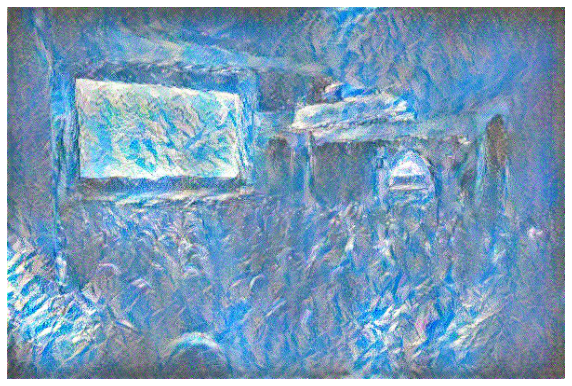

In [ ]:
#Cinema_cold
fig = plt.figure(figsize=(10, 15))
Cinema_cold = PIL.Image.open('/content/pytorch-neural-style-transfer/data/output-images/combined_BG-cinema_Feel_1/BG-cinema_Feel_1_o_lbfgs_i_random_h_400_m_vgg19_cw_100000.0_sw_300.0_tv_0.1.jpg')
plt.axis('off')
plt.imshow(Cinema_cold)
plt.show()








## Changing Content and Style Loss Layers
- You can also select the layers that calculates content loss and style loss
  - Only implemented for `config['model'] = vgg16exp`

- You can select the layer by its name
  - `config['content_layer'] = 'conv2_1'` will use the output of `conv2_1` layer for calculating content loss
  - `config['style_layers'] = 'conv1_2 conv2_2 conv3_3'` will use the output of `conv1_2`, `conv2_2`, and `conv3_3` layers to calculate style losses

- In VGG16Experimental, layers names look like this:
  - conv1_1
    - relu1_1 (relu of conv1_1)
    - every conv layer has corresponding relu output
      - e.g. the ReLU output of conv5_1 is relu5_1
  - conv1_2
  - conv2_1 (max_pool of relu1_2), conv2_2
  - conv3_1 (max_pool of relu2_2), conv3_2, conv3_3
  - conv4_1 (maxpool of relu3_3), conv4_2, conv4_3
  - conv5_1 (maxpool of relu4_3), conv5_2, conv5_3

In [33]:
config = get_default_config_for_nst()

# It only works with vgg16exp!!!!
config['model'] = 'vgg16exp'

config['content_img_name'] = 'BG-cinema.jpg'
config['style_img_name'] = 'Feel_1.jpg'
config['height'] = 400

config['content_weight'] = 1e5
config['style_weight'] = 3e2
config['tv_weight'] = 1e-1

config['optimizer'] = 'lbfgs'
config['init_method'] = 'content'
config['saving_freq'] = -1

config['content_layer'] = 'conv1_1'
config['style_layers'] = 'conv2_1 conv2_2 conv3_1'


# Make Image
arguments = change_dict_to_argument_script(config)
!python3 pytorch-neural-style-transfer/neural_style_transfer.py $arguments
# The output image will be saved in pytorch-neural-style-transfer/data/output-images/

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
conv1_1 ['conv2_1', 'conv2_2', 'conv3_1']
['conv1_1', 'conv2_1', 'conv2_2', 'conv3_1']
Using vgg16exp in the optimization procedure.
L-BFGS | iteration: 000, total loss=4410716454912.0000, content_loss=      0.0000, style loss=4410714240000.0000, tv loss=1884630.0000
L-BFGS | iteration: 001, total loss=4410715406336